r_f= 1.0202013400267558  u= 1.2214027581601699 d= 0.8187307530779818  q_u= 0.5003342283694454  q_d= 0.4996657716305546


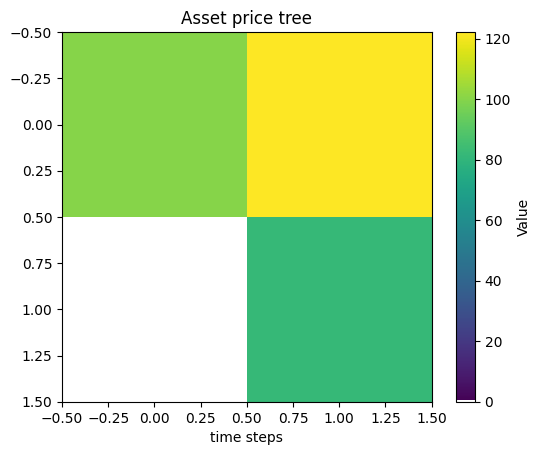

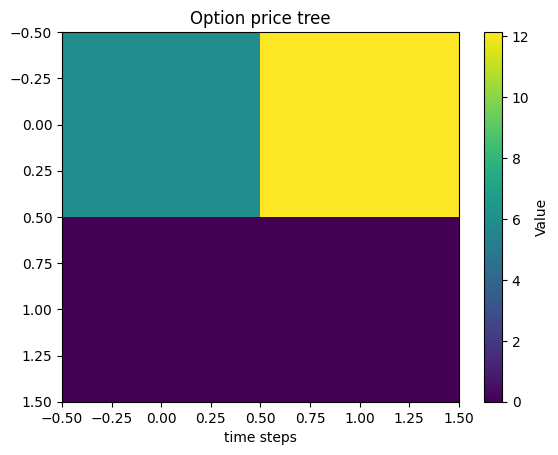

option price 5.953918402459453


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from matplotlib.colors import ListedColormap


sigma=0.2  #asset volatility
S0=100     #starting asset price
K=110      #Strike
H=130      #Barrier
N=2     #Number of time steps

r_f=np.exp(0.02/(N-1))
u=np.exp(sigma*np.sqrt(1/(N-1)))
d=1/u
q_u=(r_f-d)/(u-d)
q_d=1-q_u
print('r_f=',r_f,' u=',u,'d=',d,' q_u=',q_u,' q_d=',q_d)

#asset tree computation
asset_tree=np.zeros((N,N))
asset_tree[0,0]=S0
for j in range(1,N):
    for i in range(j+1):
            asset_tree[i,j]=S0*(u**(j-i))*d**i

#plot of the tree
cmap = plt.cm.viridis  
cmap = cmap(np.linspace(0, 1, cmap.N))
cmap[0] = [1, 1, 1, 1]
custom_cmap = ListedColormap(cmap)
plt.imshow(asset_tree, cmap=custom_cmap)
plt.colorbar(label='Value')
plt.xlabel('time steps')
plt.title('Asset price tree')
plt.show()



#option tree computation 
option_tree=np.zeros((N,N))
for i in range(N):
    if(asset_tree[i,N-1]>H): option_tree[i,N-1]=0
    else: option_tree[i,N-1]=max(asset_tree[i,N-1]-K,0)
for j in range(N-1):
    for i in range(N-1-j):
        if(asset_tree[i,N-2-j]>H): option_tree[i,N-2-j]=0
        else: option_tree[i,N-2-j]=1/r_f*(q_u*option_tree[i,N-1-j]+q_d*option_tree[i+1,N-1-j])
            
#plot of the hedging portfolio tree            
plt.imshow(option_tree, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('time steps')
plt.title('Option price tree')
plt.show()

print('option price', option_tree[0,0])

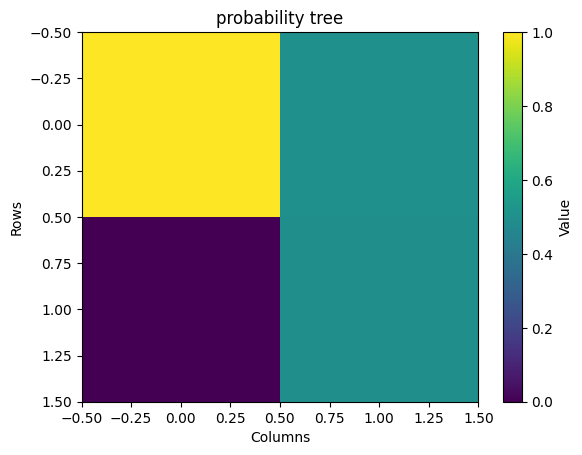

In [7]:
#risk neutral probability density flow computation 
probability_tree=np.zeros((N,N))
probability_tree[0,0]=1
for j in range(1,N):
    for i in range(j+1):
        probability_tree[i,j]=comb(j, i, exact=True)*q_u**(j-i)*q_d**i
        
plt.imshow(probability_tree, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('probability tree')
plt.show()      

In [4]:
#computation of the expectation value of S_T and its variance at maturity
mu, dummy=0, 0
for i in range(N):
    mu=mu+asset_tree[i,N-1]*probability_tree[i,N-1]
print(mu)
for i in range(N):
    dummy=dummy+asset_tree[i,N-1]**2*probability_tree[i,N-1]
var=(dummy-mu**2)/mu**2
print(var)

102.01809362039182
0.040767201850158585


r_f= 1.05  u= 1.1 d= 0.9  q_u= 0.7499999999999999  q_d= 0.2500000000000001


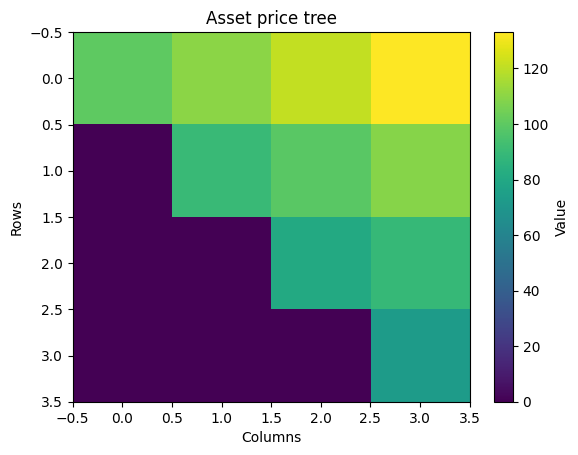

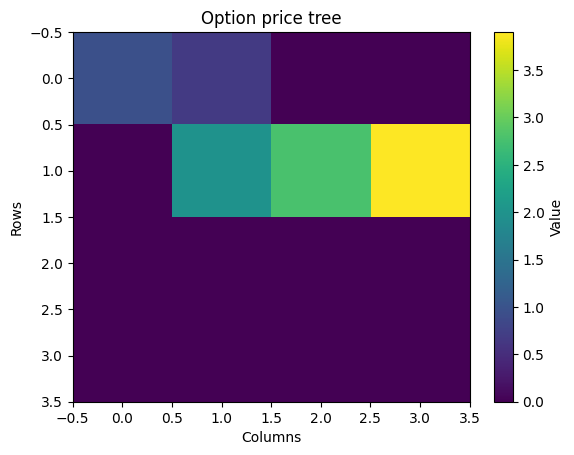

option price 0.9475218658892177


In [5]:
#Check that it works using exercise 5

S0=100     #starting asset price
K=105      #Strike
H=120      #Barrier
N=4      #Number of time steps

r_f=1.05
u=1.1
d=0.9
q_u=(r_f-d)/(u-d)
q_d=1-q_u
print('r_f=',r_f,' u=',u,'d=',d,' q_u=',q_u,' q_d=',q_d)

asset_tree=np.zeros((N,N))
asset_tree[0,0]=S0
for j in range(1,N):
    for i in range(j+1):
            asset_tree[i,j]=S0*(u**(j-i))*d**i
        
plt.imshow(asset_tree, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Asset price tree')
plt.show()

option_tree=np.zeros((N,N))
for i in range(N):
    if(asset_tree[i,N-1]>H): option_tree[i,N-1]=0
    else: option_tree[i,N-1]=max(asset_tree[i,N-1]-K,0)

for j in range(N-1):
    for i in range(N-1-j):
        if(asset_tree[i,N-2-j]>H): option_tree[i,N-2-j]=0
        else: option_tree[i,N-2-j]=1/r_f*(q_u*option_tree[i,N-1-j]+q_d*option_tree[i+1,N-1-j])
plt.imshow(option_tree, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Option price tree')
plt.show()

print('option price', option_tree[0,0])
#print(option_tree)
    
        